# Analyse des Aggregates Returns

## Importation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Fonctions

In [2]:
def get_OLS(x,y):
    x_with_const = sm.add_constant(x)
    # Modélisation de la régression
    model = sm.OLS(y, x_with_const)
    results = model.fit()
    return results

In [3]:
def bootstrap_bias(data,params,nb) :
    betas = []
    stats = []
    rsquared = []
    for _ in range(nb):
        sample = data.sample(frac=1, replace=True)  # Resample with replacement
        res = get_OLS(sample['SSI'],sample.iloc[:,1])
        betas.append(res.params[1])
        stats.append(res.tvalues[1])
        rsquared.append(res.rsquared_adj)
    bias = np.mean(betas) - params[1]
    pvalue = np.mean(np.abs(stats))
    percentiles = [90, 95, 99]
    r2adj = [np.percentile(rsquared, p) for p in percentiles]
    return bias,pvalue,r2adj

## Données

In [12]:
SSI = pd.read_csv(r'..\data\SSI.csv',index_col=0)
SSI.columns=['SSI']

In [31]:
def filter_data(df, start_date, end_date=None):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    filtered_df = df.loc[start_date:end_date]
    return filtered_df

In [33]:
SSI.index = pd.to_datetime(SSI.index)
SSI

,SSI
Dates,
2006-08-31,-4.573529
2006-09-30,-1.902706
2006-10-31,-0.911145
2006-11-30,-0.087120
2006-12-31,-0.488747
...,...
2023-11-30,0.039909
2023-12-31,-0.387040
2024-01-31,0.338068


In [34]:
filter_data(SSI,None,"2023-10-30")

,SSI
Dates,
2006-08-31,-4.573529
2006-09-30,-1.902706
2006-10-31,-0.911145
2006-11-30,-0.087120
2006-12-31,-0.488747
...,...
2023-05-31,-0.350242
2023-06-30,0.083920
2023-07-31,0.001275


In [5]:
SP500 = pd.read_excel(r"..\data\sp500.xlsx",index_col=0)[['PX_LAST']]
SP500_lag = SP500
SP500=SP500.reset_index(drop=False).resample('M', on='Date').mean().pct_change()

C:\Users\collo\AppData\Local\Temp\ipykernel_33756\4255522607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  SP500=SP500.reset_index(drop=False).resample('M', on='Date').mean().pct_change()


## Comtemporaine

Full sample

In [11]:
# Données d'exemple
x = SSI['SSI'][:162]
y = SP500['PX_LAST'][6:168]
x.index = y.index
# Modélisation de la régression
results = get_OLS(x, y)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                PX_LAST   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1429
Date:                Sat, 08 Jun 2024   Prob (F-statistic):              0.706
Time:                        17:02:24   Log-Likelihood:                 308.99
No. Observations:                 162   AIC:                            -614.0
Df Residuals:                     160   BIC:                            -607.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.003      2.190      0.0

Post 2009

In [7]:
# Données d'exemple
x = SSI['SSI'][:162][30:]
y = SP500['PX_LAST'][6:168][30:]
x.index = y.index
results = get_OLS(x, y)
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                PX_LAST   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.089
Date:                Sat, 08 Jun 2024   Prob (F-statistic):             0.0452
Time:                        17:02:10   Log-Likelihood:                 275.21
No. Observations:                 132   AIC:                            -546.4
Df Residuals:                     130   BIC:                            -540.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.003      4.307      0.0

## Predictive

### Full sample

In [8]:
# Données d'exemple
x = SSI['SSI'][:162]
y = SP500['PX_LAST'][6:169].shift(-1).dropna()
x.index = y.index
# Modélisation de la régression
results = get_OLS(x, y)
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                PX_LAST   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     89.52
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           3.79e-17
Time:                        17:02:10   Log-Likelihood:                 344.66
No. Observations:                 162   AIC:                            -685.3
Df Residuals:                     160   BIC:                            -679.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.002      1.565      0.1

### post - 2009

In [9]:
# Données d'exemple
x = SSI['SSI'][:162][30:]
y = SP500['PX_LAST'][6:169][30:].shift(-1).dropna()
x.index = y.index
# Modélisation de la régression
results = get_OLS(x, y)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                PX_LAST   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     43.22
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           1.08e-09
Time:                        17:02:10   Log-Likelihood:                 292.17
No. Observations:                 132   AIC:                            -580.3
Df Residuals:                     130   BIC:                            -574.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.002      2.481      0.0

In [37]:
data = pd.DataFrame({
    'SSI': x,
    'PX_LAST': y})
bootstrap_bias(data,results.params,1000)

ValueError: If using all scalar values, you must pass an index

In [2]:
from ssi_building import * 
from data_collection import *
from analysis import * 

In [3]:

def building_SSI_csv():
    tickers = ['SDS',"QID","QLD","SSO","DDM","DXD"]
    data=pd.DataFrame()
    for tick in tickers:
        data_tick = pd.read_csv(f"..\data\{tick}-historical_nav.csv",index_col=0)[["Shares Outstanding (000)"]]
        data_tick.columns = [tick]
        data = pd.concat([data,data_tick],axis=1)
    data.index = pd.to_datetime(data.index)
    data1 = data.resample('M').last().multiply(1000).pct_change().dropna()
    return compute_SSI(data1),data

In [4]:
def index_aligned(df1,df2):
    common_index = df1.index.intersection(df2.index)
    df1_aligned = df1.loc[common_index]
    df2_aligned = df2.loc[common_index]
    return df1_aligned,df2_aligned

In [29]:
from sklearn.preprocessing import StandardScaler


C:\Users\collo\AppData\Local\Temp\ipykernel_31604\3697760008.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data1 = data.resample('M').last().multiply(1000).pct_change().dropna()
[*********************100%%**********************]  1 of 1 completed

Speculation sentiment et Rendement Globaux



C:\Users\collo\AppData\Local\Temp\ipykernel_31604\2258552884.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  serie = yf_Data.get_yf_data(symbol,startDate,endDate).reset_index(drop=False).resample('M', on='Date').mean().pct_change()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     10.09
Date:                Sun, 09 Jun 2024   Prob (F-statistic):            0.00181
Time:                        13:01:03   Log-Likelihood:                 306.29
No. Observations:                 152   AIC:                            -608.6
Df Residuals:                     150   BIC:                            -602.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.003      2.194      0.030       0.001       0.011
SSI           -0.0163      0.005     -3.177      0.002      -0.026      -0.006
==============================================================================
Omnibus:                       83.442   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.205
Skew:                          -1.873   Prob(JB):                    9.10e-120
Kurtosis:                      11.516   Cond. No.                         2.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

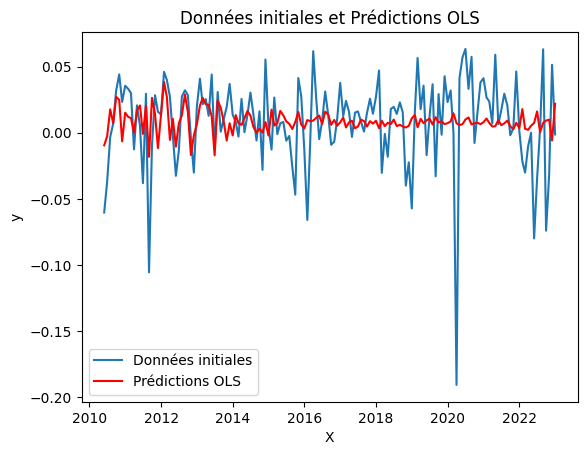

In [36]:
print("Speculation sentiment et Rendement Globaux")
symbol = "^GSPC"
startDate = "2010-04-01"
endDate = "2023-01-02"
SSI,data = building_SSI_csv()
serie = yf_Data.get_yf_data(symbol,startDate,endDate).reset_index(drop=False).resample('M', on='Date').mean().pct_change()
SSI_filter = filter_data(SSI,startDate,endDate)
scaler = StandardScaler()
SSI = pd.DataFrame(scaler.fit_transform(SSI),index=SSI.index,columns=SSI.columns)
model,(x,y) = predictive_analysis_ssi(serie,SSI,0)
x = sm.add_constant(x)
fig, ax = plt.subplots()
ax.plot(y, label='Données initiales')
ax.plot(model.predict(x), color='red', label='Prédictions OLS')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Données initiales et Prédictions OLS')
model.summary()

In [41]:
def bootstrap_bias(data,params,nb) :
    betas = list()
    stats = []
    rsquared = []
    for _ in range(nb):
        sample = data.sample(frac=1, replace=True)  # Resample with replacement
        res = get_OLS(sample['SSI'],sample.iloc[:,1])
        betas.append(res.params[1])
        stats.append(res.tvalues[1])
        rsquared.append(res.rsquared_adj)
    bias = np.mean(betas) - params[1]
    pvalue = np.mean(np.abs(stats))
    percentiles = [90, 95, 99]
    r2adj = [np.percentile(rsquared, p) for p in percentiles]
    return bias,pvalue,r2adj


In [45]:
def parametric_bootstrap_with_r2_adj(model, X, n_iterations=1000):
    residuals = model.resid
    fitted_values = model.fittedvalues
    coefficients = model.params
    t_values = model.tvalues
    
    bootstrap_coefs = []
    bootstrap_t_stats = []
    bootstrap_r2_adj = []
    
    np.random.seed(0)  # Pour la reproductibilité
    
    for _ in range(n_iterations):
        # Resélectionner les résidus
        resampled_residuals = np.random.choice(residuals, size=len(residuals), replace=True)
        # Créer une nouvelle variable réponse
        y_bootstrap = fitted_values + resampled_residuals
        # Ajuster le modèle à l'échantillon bootstrap
        bootstrap_model = sm.OLS(y_bootstrap, X).fit()
        bootstrap_coefs.append(bootstrap_model.params)
        bootstrap_t_stats.append(bootstrap_model.tvalues)
        bootstrap_r2_adj.append(bootstrap_model.rsquared_adj)
    
    # Convertir les listes en DataFrame pour une manipulation plus facile
    bootstrap_coefs = pd.DataFrame(bootstrap_coefs)
    bootstrap_t_stats = pd.DataFrame(bootstrap_t_stats)
    bootstrap_r2_adj = pd.Series(bootstrap_r2_adj)
    
    # Calculer le biais
    bias = bootstrap_coefs.mean() - coefficients
    
    # Calculer les p-values à partir des t-statistiques simulées
    p_values = (bootstrap_t_stats.abs() > t_values.abs()).mean()
    
    # Calculer le R² ajusté moyen
    mean_r2_adj = bootstrap_r2_adj.mean()
    
    return bias, p_values, mean_r2_adj

In [46]:
bootstrap_bias(x,model.params,100)

C:\Users\collo\AppData\Local\Temp\ipykernel_31604\2221718772.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas.append(res.params[1])
C:\Users\collo\AppData\Local\Temp\ipykernel_31604\2221718772.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stats.append(res.tvalues[1])
C:\Users\collo\AppData\Local\Temp\ipykernel_31604\2221718772.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  betas.append(res.params[1])
C:\Users\col

(1.0162971957961144, 2.3099055848340672e+17, [1.0, 1.0, 1.0])